### Imports

In [1]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL
from IPython.display import Image

### API Server

In [26]:
#apiServer = "http://localhost:8080/api/v1"
apiServer = "http://x570-test.local:8080/api/v1"

### Input Image

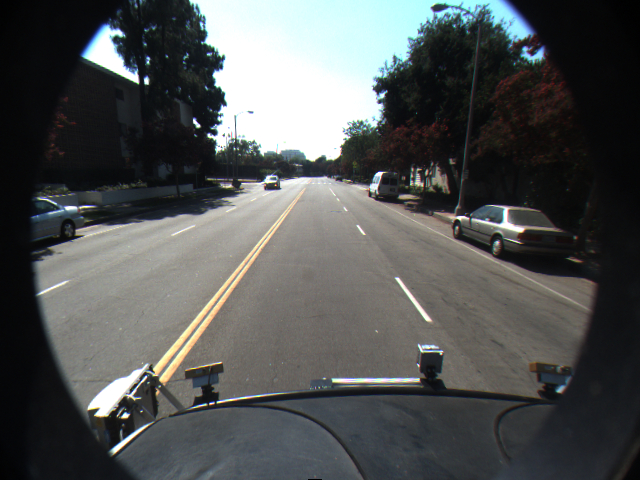

In [3]:
image = "sample_lanedetect.jpg"
Image(filename=image)

### Classify Request (remote)

In [27]:
files = {'image': (image, open(image, 'rb') ) }
model = "vpgnet_pruned_0_99"

# make request
response = requests.post(apiServer + '/images/lane-detect?model=' + model, files=files)
response.status_code

200

### Inspect results:

Line: type=3 points=137
Line: type=1 points=89
Line: type=2 points=169
Line: type=1 points=33
Line: type=1 points=41


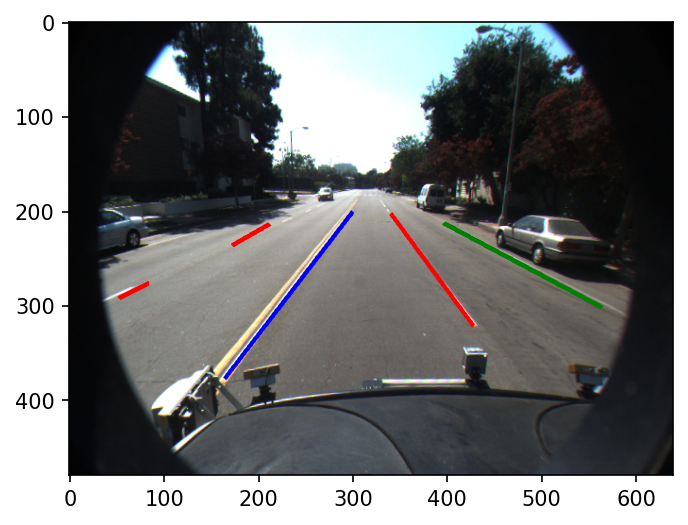

In [31]:
jsonResponse = json.loads(response.content)

for result in jsonResponse['data']['results']:
    print("Line: type={} points={}".format(result['type'], len(result['points'])))

# Create figure and axes
fig, ax = plt.subplots()
fig.set_dpi(150)

# Display the image
ax.imshow(PIL.Image.open(image))

colors = dict()
colors[1] = 'r'
colors[2] = 'g'
colors[3] = 'b'
colors[4] = 'y'
colors[5] = 'w'
# Create a Rectangle patch
for result in jsonResponse['data']['results']:
    points = []
    for point in result['points']:
        points.append([ point['x'], point['y'] ])
        
    ax.add_patch(patches.Polygon(points, False, linewidth=2, edgecolor=colors[result['type']], facecolor='none'))
    #ax.add_patch(patches.Rectangle(
    #    (result['x'], result['y']), result['width'], result['height'], linewidth=2, edgecolor='r', facecolor='none')) 

# Add the patch to the Axes
plt.show()